<a href="https://colab.research.google.com/github/elshajulidda/tugasutsmachinelearning/blob/main/Tugas_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install ucimlrepo

In [ ]:
#cek dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)

# variable information
print(dry_bean.variables)


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'ID': 244, 'type': 'NATIVE', 'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'venue': 'Co

Mencoba memuat Dry Bean Dataset dari URL...
Dataset berhasil dimuat.

--- Informasi Awal Dataset ---
5 baris pertama data:
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.9848

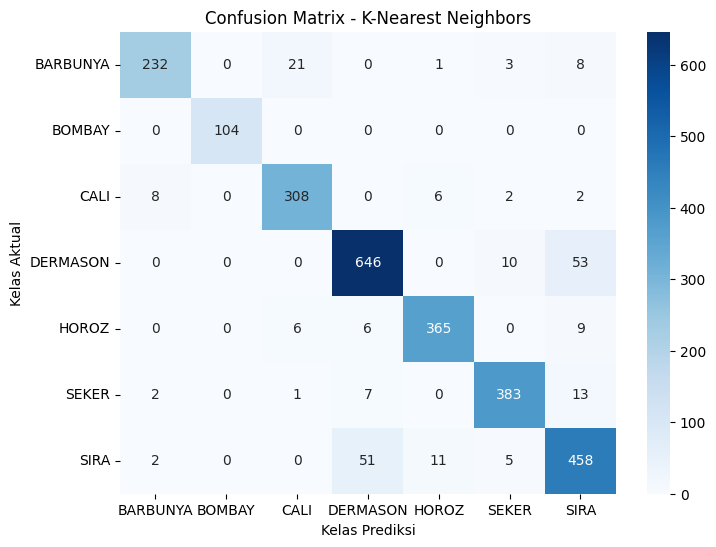


--- Melatih dan Mengevaluasi: Naive Bayes (Gaussian) ---
Akurasi: 0.8979

Laporan Klasifikasi:
              precision    recall  f1-score   support

    BARBUNYA       0.90      0.80      0.85       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.86      0.92      0.89       326
    DERMASON       0.93      0.86      0.90       709
       HOROZ       0.95      0.95      0.95       386
       SEKER       0.92      0.94      0.93       406
        SIRA       0.81      0.89      0.84       527

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



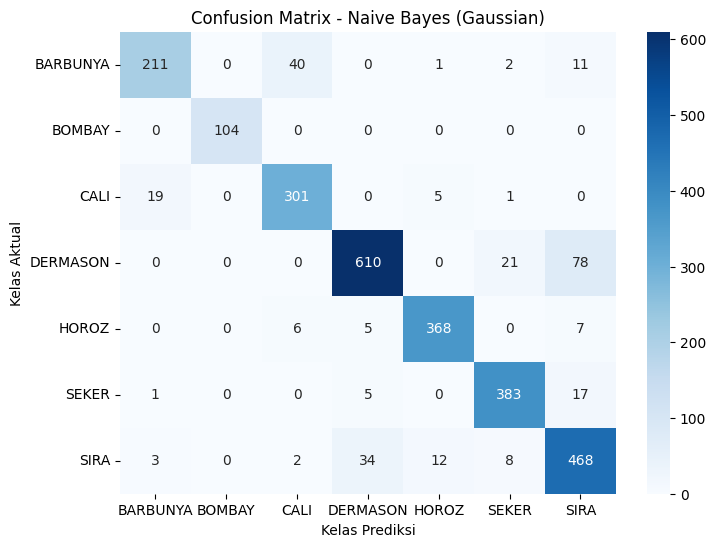


--- Melatih dan Mengevaluasi: Decision Tree ---
Akurasi: 0.8920

Laporan Klasifikasi:
              precision    recall  f1-score   support

    BARBUNYA       0.88      0.91      0.89       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.91      0.92       326
    DERMASON       0.88      0.90      0.89       709
       HOROZ       0.94      0.91      0.93       386
       SEKER       0.91      0.95      0.93       406
        SIRA       0.83      0.79      0.81       527

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723



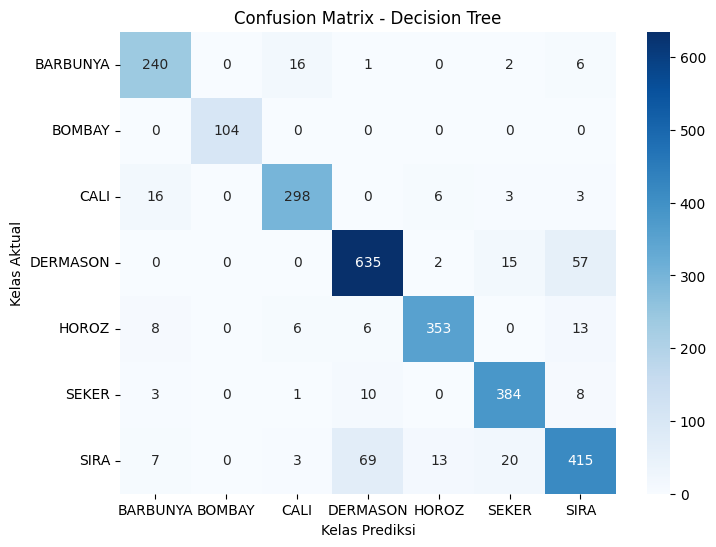


--- Melatih dan Mengevaluasi: Random Forest ---
Akurasi: 0.9207

Laporan Klasifikasi:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.90      0.92      0.91       709
       HOROZ       0.97      0.95      0.96       386
       SEKER       0.94      0.96      0.95       406
        SIRA       0.86      0.86      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



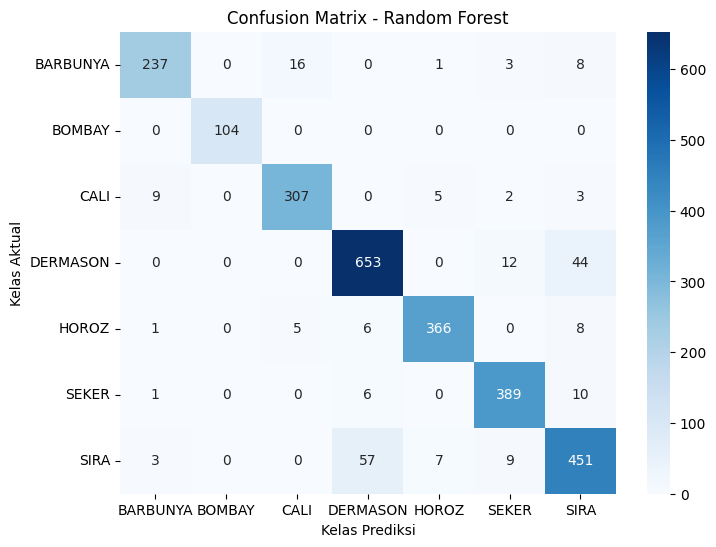


--- Perbandingan Akurasi Model ---
                    Model   Akurasi
3           Random Forest  0.920676
0     K-Nearest Neighbors  0.916636
1  Naive Bayes (Gaussian)  0.897907
2           Decision Tree  0.892031


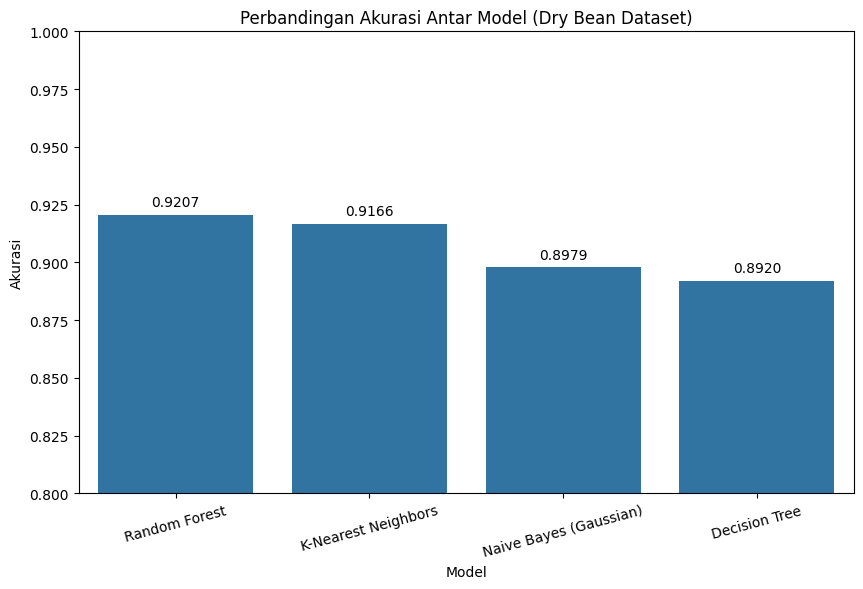

In [ ]:
#algoritma KNN,Naive Bayes, Decision Tree dan Random Forest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Memuat Dataset (KEMBALI KE CARA UNTUK FILE EXCEL) ---
# URL yang benar adalah link langsung ke file .xlsx nya
# Corrected URL based on ucimlrepo metadata
url = "https://archive.ics.uci.edu/static/public/602/data.csv"
print("Mencoba memuat Dry Bean Dataset dari URL...")

try:
    # Gunakan pd.read_csv() for CSV file
    data = pd.read_csv(url)
    print("Dataset berhasil dimuat.")

except Exception as e:
    print(f"Gagal memuat dataset. Error: {e}")
    exit()

# --- 2. Eksplorasi Data Sederhana (EDA) ---
print("\n--- Informasi Awal Dataset ---")
print("5 baris pertama data:")
print(data.head())

print("\nInformasi Tipe Data dan Nilai Non-Null:")
data.info()

# Kolom target di dataset ini bernama 'Class'
print("\nDistribusi kelas target ('Class'):")
print(data['Class'].value_counts())

# --- 3. Pra-pemrosesan Data ---
print("\n--- Memulai Pra-pemrosesan Data ---")

# Memisahkan fitur (X) dan target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Fitur telah diskalakan (standardisasi).")

# --- 4. Pelatihan dan Evaluasi Model ---
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n--- Melatih dan Mengevaluasi: {name} ---")

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"Akurasi: {accuracy:.4f}")
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Kelas Aktual')
    plt.xlabel('Kelas Prediksi')
    plt.show()

# --- 5. Perbandingan Hasil ---
print("\n--- Perbandingan Akurasi Model ---")
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Akurasi'])
results_df = results_df.sort_values(by='Akurasi', ascending=False)
print(results_df)

# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
splot = sns.barplot(x='Model', y='Akurasi', data=results_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title('Perbandingan Akurasi Antar Model (Dry Bean Dataset)')
plt.ylim(0.8, 1.0) # Fokus pada akurasi tinggi
plt.xticks(rotation=15)
plt.show()


--- Melatih dan Mengevaluasi: Ensemble Learning (Voting Classifier) ---
Akurasi Voting Classifier (Ensemble): 0.9163

Laporan Klasifikasi Ensemble:
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.88      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.95      0.94       326
    DERMASON       0.92      0.89      0.90       709
       HOROZ       0.96      0.96      0.96       386
       SEKER       0.92      0.95      0.93       406
        SIRA       0.83      0.88      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



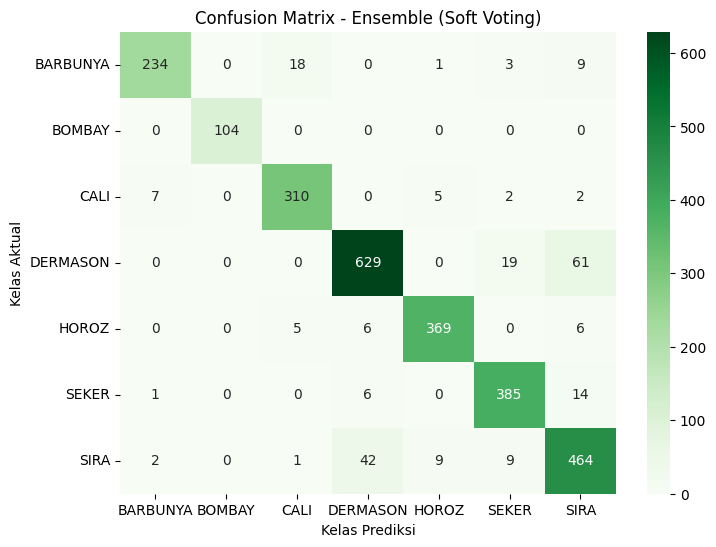


--- Perbandingan Akurasi ---
Akurasi Random Forest (Model Terbaik): 0.9207
Akurasi Voting Classifier (Ensemble): 0.9163


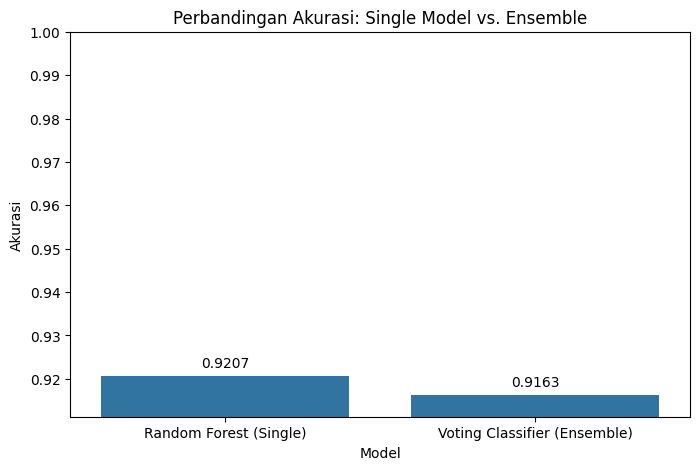

In [ ]:
#Ensemble learning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  # Tambahkan VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Memuat Dataset ---
url = "https://archive.ics.uci.edu/static/public/602/data.csv"
try:
    data = pd.read_csv(url)
except Exception as e:
    print(f"Gagal memuat dataset. Error: {e}")
    exit()

# --- 2. Pra-pemrosesan Data ---
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 3. Definisi Base Estimators (Model Individual) ---
# Menggunakan model yang sudah Anda coba sebelumnya
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = GaussianNB()
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
# Decision Tree dihilangkan karena sering memiliki performa yang lebih rendah
# dari Random Forest (yang merupakan ensemble dari Decision Tree).

estimators = [
    ('knn', clf1),
    ('nb', clf2),
    ('rf', clf3)
]

# --- 4. Implementasi Ensemble Learning (Voting Classifier) ---
print("\n--- Melatih dan Mengevaluasi: Ensemble Learning (Voting Classifier) ---")

# Menggunakan 'soft' voting karena model memberikan probabilitas kelas (kecuali Naive Bayes)
# 'soft' voting mengambil rata-rata probabilitas prediksi dari setiap model.
eclf = VotingClassifier(estimators=estimators, voting='soft')

# Melatih Voting Classifier
eclf = eclf.fit(X_train_scaled, y_train)

# Membuat prediksi
y_pred_ensemble = eclf.predict(X_test_scaled)

# Evaluasi
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

print(f"Akurasi Voting Classifier (Ensemble): {accuracy_ensemble:.4f}")
print("\nLaporan Klasifikasi Ensemble:")
print(classification_report(y_test, y_pred_ensemble))

# Confusion Matrix Ensemble
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Greens', xticklabels=eclf.classes_, yticklabels=eclf.classes_)
plt.title('Confusion Matrix - Ensemble (Soft Voting)')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()

# --- 5. Perbandingan dengan Model Terbaik Sebelumnya (Misalnya Random Forest) ---
# Dapatkan akurasi model terbaik sebelumnya (diasumsikan Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\n--- Perbandingan Akurasi ---")
print(f"Akurasi Random Forest (Model Terbaik): {accuracy_rf:.4f}")
print(f"Akurasi Voting Classifier (Ensemble): {accuracy_ensemble:.4f}")

# Visualisasi perbandingan Ensemble vs Model Terbaik
results_final = pd.DataFrame({
    'Model': ['Random Forest (Single)', 'Voting Classifier (Ensemble)'],
    'Akurasi': [accuracy_rf, accuracy_ensemble]
}).sort_values(by='Akurasi', ascending=False)

plt.figure(figsize=(8, 5))
splot = sns.barplot(x='Model', y='Akurasi', data=results_final)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.title('Perbandingan Akurasi: Single Model vs. Ensemble')
plt.ylim(min(results_final['Akurasi']) - 0.005, 1.0)
plt.show()

In [ ]:
# pip install shap

In [ ]:
pip install pandas numpy scikit-learn matplotlib shap

📥 Memuat dataset Dry Bean dari URL...
✅ Dataset berhasil dimuat.

Distribusi kelas:
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Ukuran train / test: (10888, 16) / (2723, 16)

🔹 Melatih model: KNN
Akurasi KNN: 0.9166

🔹 Melatih model: Naive Bayes
Akurasi Naive Bayes: 0.8979

🔹 Melatih model: Decision Tree
Akurasi Decision Tree: 0.8920

🔹 Melatih model: Random Forest
Akurasi Random Forest: 0.9203

📊 Ringkasan Akurasi:
 - KNN: 0.9166
 - Naive Bayes: 0.8979
 - Decision Tree: 0.8920
 - Random Forest: 0.9203

🔍 Explainable AI (XAI) dengan SHAP

🎨 Membuat visualisasi subplot 2x2...


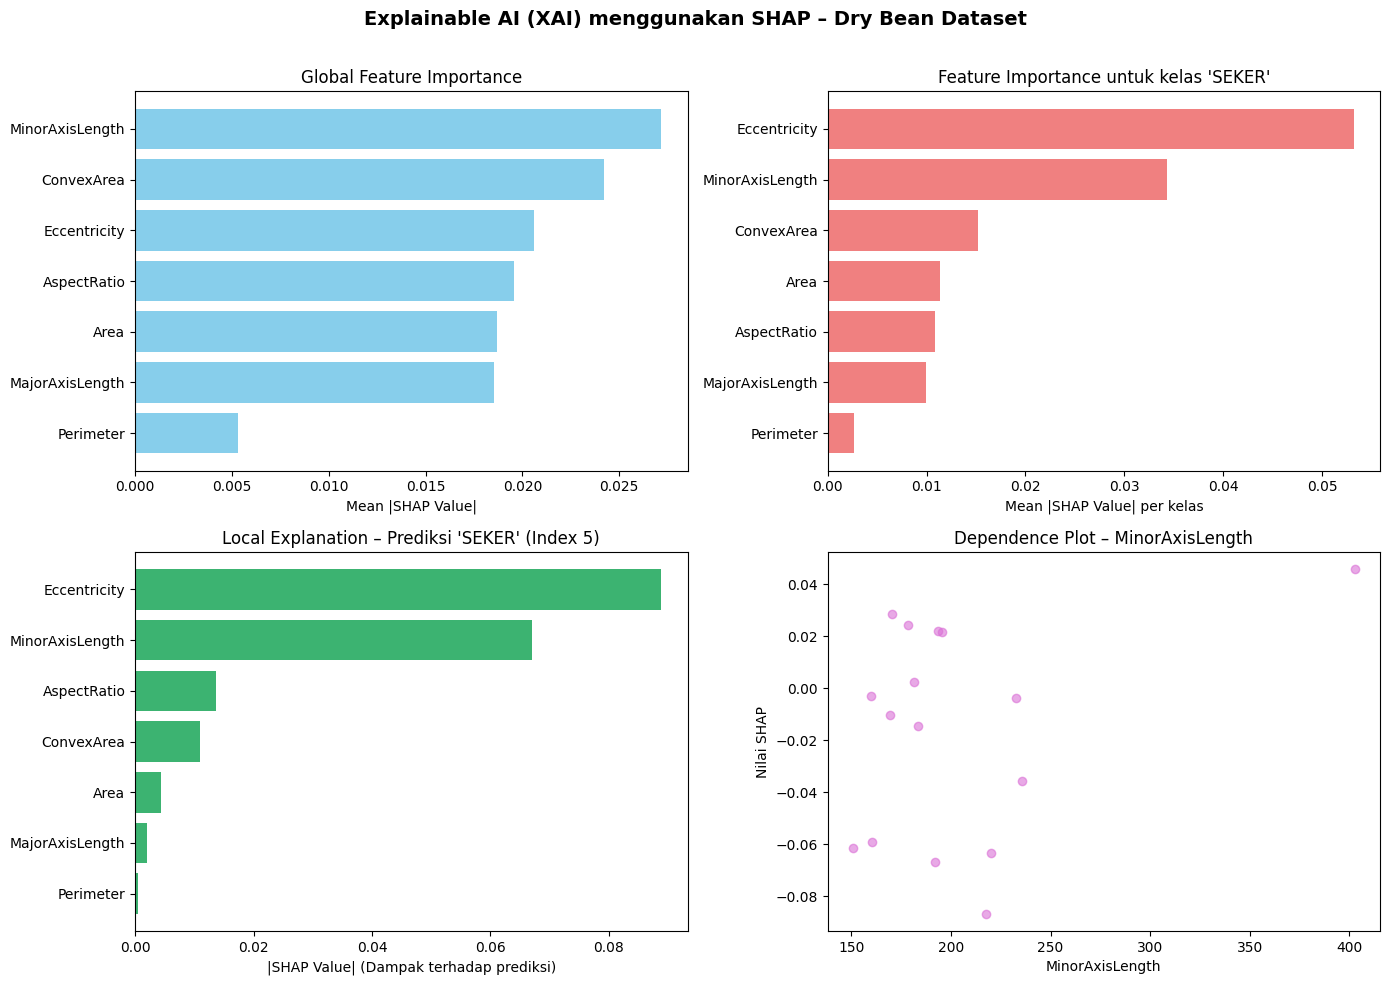


✅ Semua grafik SHAP berhasil ditampilkan dan disimpan di: shap_plots/shap_subplot_summary.png


In [ ]:
 # ==================================================================
# Menerapkan Explainable AI (XAI) menggunakan metode shap_xai_drybean
# ===================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import shap
import os

# ---------------------------
# 1. Load dataset
# ---------------------------
url = "https://archive.ics.uci.edu/static/public/602/data.csv"
print(" Memuat dataset Dry Bean dari URL...")

data = pd.read_csv(url)
print(" Dataset berhasil dimuat.")
print("\nDistribusi kelas:")
print(data['Class'].value_counts())

# ---------------------------
# 2. Split fitur & target
# ---------------------------
X = data.drop(columns=['Class'])
y = data['Class']
feature_names = X.columns.tolist()
class_names = sorted(y.unique())

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print(f"\nUkuran train / test: {X_train.shape} / {X_test.shape}")

# ---------------------------
# 3. Scaling (untuk model tertentu)
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 4. Pelatihan model
# ---------------------------
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
rf_model = None

for name, model in models.items():
    print(f"\n🔹 Melatih model: {name}")
    if name in ["KNN", "Naive Bayes"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    elif name == "Random Forest":
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        rf_model = model
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"Akurasi {name}: {acc:.4f}")

print("\n Ringkasan Akurasi:")
for k, v in results.items():
    print(f" - {k}: {v:.4f}")

# ---------------------------
# 5. Explainable AI (XAI) dengan SHAP
# ---------------------------
print("\n" + "="*60)
print("Explainable AI (XAI) dengan SHAP")
print("="*60)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Hitung rata-rata nilai absolut shap antar kelas
mean_abs_shap = np.mean([np.abs(sv) for sv in shap_values], axis=0)
global_importance = mean_abs_shap.mean(axis=0)
sorted_idx = np.argsort(global_importance)[::-1]

# Pilih instance untuk local explanation
instance_index = 5
single_instance = X_test.iloc[instance_index:instance_index+1]
actual_class = y_test.reset_index(drop=True).iloc[instance_index]
predicted_class = rf_model.predict(single_instance)[0]
class_index_pred = class_names.index(predicted_class)

# Local SHAP values
feature_importance_local = np.abs(shap_values[class_index_pred][instance_index])
sorted_idx_local = np.argsort(feature_importance_local)[::-1]

# Dua fitur teratas untuk dependence plot
top_features_idx = np.argsort(-global_importance)[:2]

# ---------------------------
# 6. Visualisasi 2x2 Subplot
# ---------------------------
print("\n Membuat visualisasi subplot 2x2...")

# Buat folder output
OUT_DIR = "shap_plots"
os.makedirs(OUT_DIR, exist_ok=True)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Explainable AI (XAI) menggunakan SHAP – Dry Bean Dataset", fontsize=14, fontweight="bold")

# (1) Global Feature Importance
axs[0, 0].barh(np.array(feature_names)[sorted_idx], global_importance[sorted_idx], color="skyblue")
axs[0, 0].invert_yaxis()
axs[0, 0].set_title("Global Feature Importance", fontsize=12)
axs[0, 0].set_xlabel("Mean |SHAP Value|")

# (2) Feature Importance per kelas prediksi
class_importance = np.abs(shap_values[class_index_pred]).mean(axis=0)
sorted_idx_class = np.argsort(class_importance)[::-1]
axs[0, 1].barh(np.array(feature_names)[sorted_idx_class], class_importance[sorted_idx_class], color="lightcoral")
axs[0, 1].invert_yaxis()
axs[0, 1].set_title(f"Feature Importance untuk kelas '{predicted_class}'", fontsize=12)
axs[0, 1].set_xlabel("Mean |SHAP Value| per kelas")

# (3) Local Explanation (instance tunggal)
axs[1, 0].barh(np.array(feature_names)[sorted_idx_local], feature_importance_local[sorted_idx_local], color="mediumseagreen")
axs[1, 0].invert_yaxis()
axs[1, 0].set_title(f"Local Explanation – Prediksi '{predicted_class}' (Index {instance_index})", fontsize=12)
axs[1, 0].set_xlabel("|SHAP Value| (Dampak terhadap prediksi)")

# (4) Dependence Plot fitur utama
idx0, idx1 = top_features_idx
x_feat = X_test.iloc[:, idx0].values
y_shap = shap_values[class_index_pred][:, idx0]

# Pastikan ukuran sama
min_len = min(len(x_feat), len(y_shap))
x_feat = x_feat[:min_len]
y_shap = y_shap[:min_len]

axs[1, 1].scatter(x_feat, y_shap, alpha=0.6, color="orchid")
axs[1, 1].set_xlabel(feature_names[idx0])
axs[1, 1].set_ylabel("Nilai SHAP")
axs[1, 1].set_title(f"Dependence Plot – {feature_names[idx0]}", fontsize=12)

# Tata letak dan simpan
plt.tight_layout(rect=[0, 0, 1, 0.97])
save_path = os.path.join(OUT_DIR, "shap_subplot_summary.png")
plt.savefig(save_path, bbox_inches="tight", dpi=150)
plt.show()

print(f"\n Semua grafik SHAP berhasil ditampilkan dan disimpan di: {save_path}")


In [ ]:
 !pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.2/399.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.6.7
    Uninstalling cvxpy-1.6.7:
      Successfully uninstalled cvxpy-1.6.7


In [ ]:
import dowhy
from dowhy import CausalModel

Memuat dataset Dry Bean dari URL...
Dataset berhasil dimuat.

Distribusi kelas:
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64
Akurasi KNN: 0.9166
Akurasi Naive Bayes: 0.8979
Akurasi Decision Tree: 0.8920
Akurasi Random Forest: 0.9203

 Explainable AI (XAI) dengan SHAP


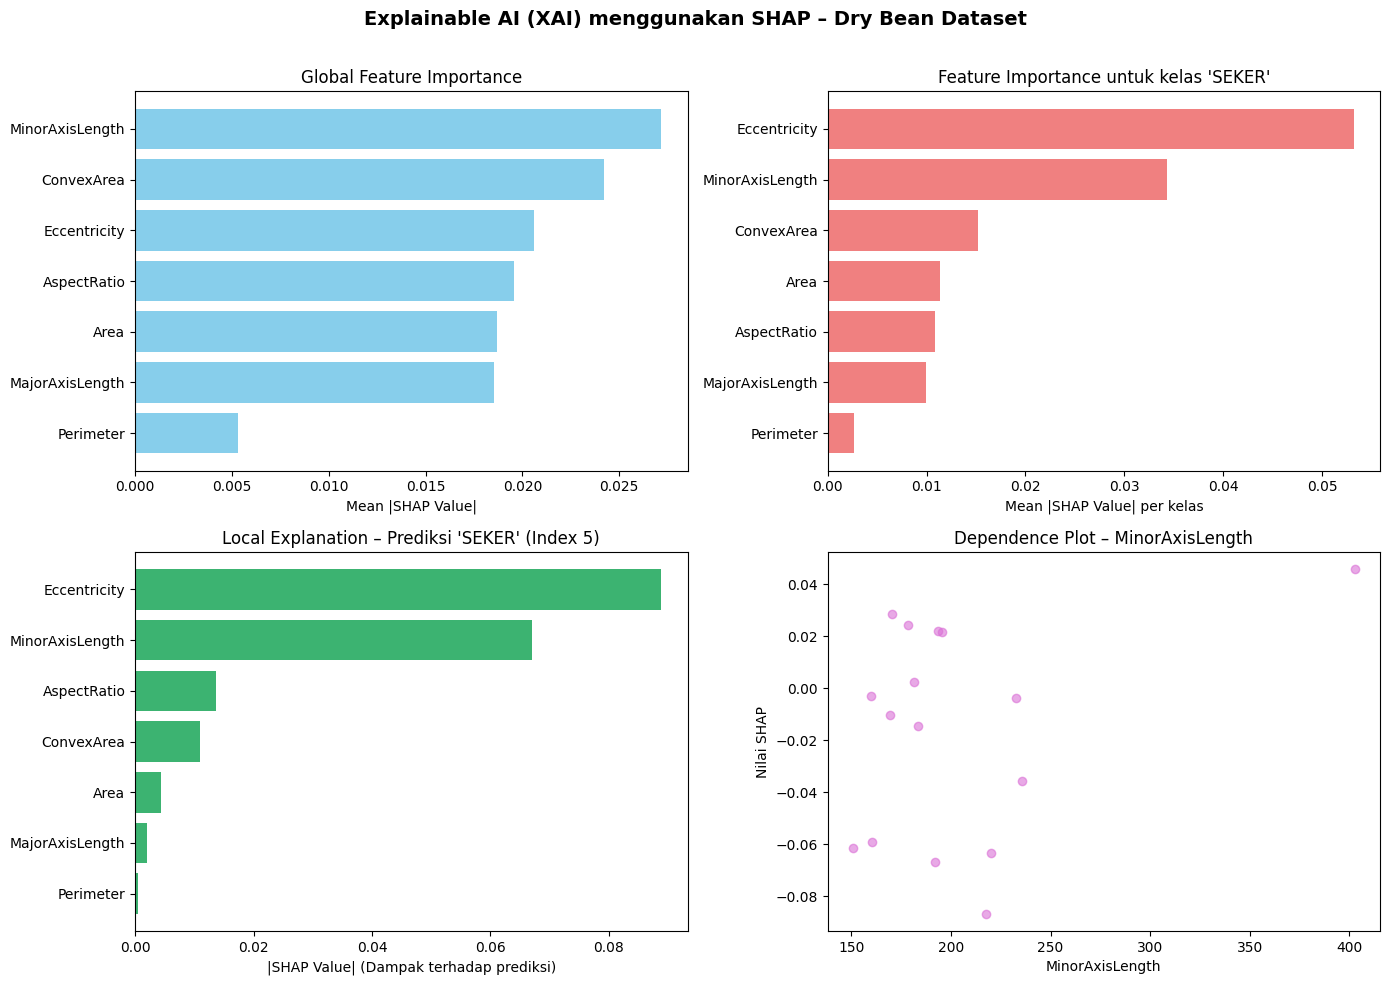

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



 Semua grafik SHAP berhasil ditampilkan dalam 1 jendela (subplot 2x2).

 Analisis Inferensi Kausal (Causal Inference)
Fitur penting untuk analisis kausal: ['MinorAxisLength', 'ConvexArea', 'Eccentricity']


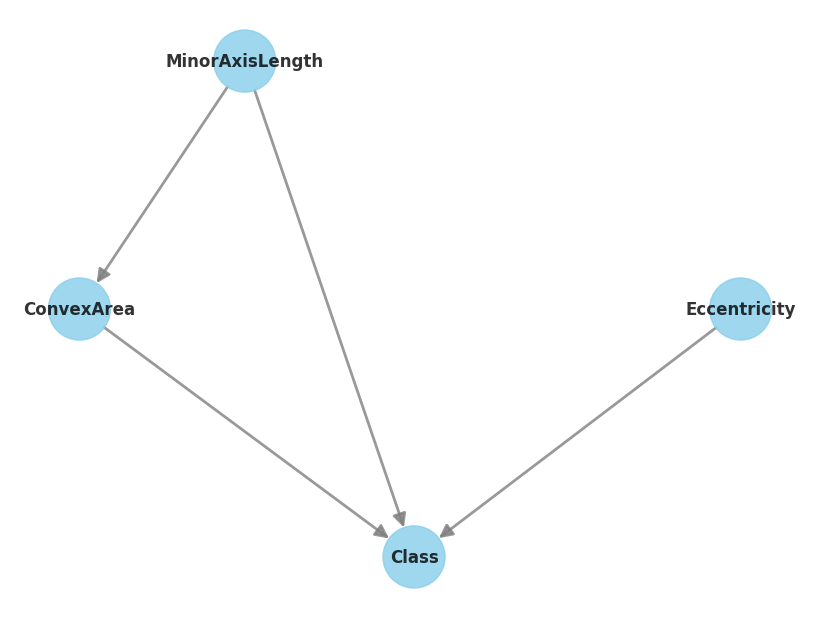


 Estimasi Efek Kausal:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                   
──────────────────(E[Class])
d[MinorAxisLength]          
Estimand assumption 1, Unconfoundedness: If U→{MinorAxisLength} and U→Class then P(Class|MinorAxisLength,,U) = P(Class|MinorAxisLength,)

## Realized estimand
b: Class~MinorAxisLength+MinorAxisLength*Eccentricity
Target units: 

## Estimate
Mean value: -0.01817738405566427
### Conditional Estimates
__categorical__Eccentricity
(0.218, 0.697]   -0.015267
(0.697, 0.748]   -0.017703
(0.748, 0.781]   -0.018449
(0.781, 0.822]   -0.019158
(0.822, 0.911]   -0.020311
dtype: float64

 Interpretasi Kausal:
- Variabel 'MinorAxisLength' berpotensi mempengaruhi 'ConvexArea' dan langsung berdampak pada variabel target 'Class'.
- Jika nilai 'MinorAxisLength' meningkat, maka cenderung memicu perubahan pada 'ConvexArea' dan dapat mengubah p

/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimator.py:266: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.12/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [ ]:
# ======================================================
# Explainable AI (XAI) + Causal Inference pada Dry Bean Dataset
# ======================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import shap

# ---------------------------
# 1. Load dataset
# ---------------------------
url = "https://archive.ics.uci.edu/static/public/602/data.csv"
print("Memuat dataset Dry Bean dari URL...")

data = pd.read_csv(url)
print("Dataset berhasil dimuat.")
print("\nDistribusi kelas:")
print(data['Class'].value_counts())

# ---------------------------
# 2. Split fitur & target
# ---------------------------
X = data.drop(columns=['Class'])
y = data['Class']
feature_names = X.columns.tolist()
class_names = sorted(y.unique())

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ---------------------------
# 3. Scaling
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 4. Pelatihan model
# ---------------------------
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
rf_model = None

for name, model in models.items():
    if name in ["KNN", "Naive Bayes"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    elif name == "Random Forest":
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        rf_model = model
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"Akurasi {name}: {acc:.4f}")

# ---------------------------
# 5. Explainable AI (XAI) dengan SHAP
# ---------------------------
print("\n" + "="*60)
print(" Explainable AI (XAI) dengan SHAP")
print("="*60)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Hitung rata-rata nilai absolut shap antar kelas
mean_abs_shap = np.mean([np.abs(sv) for sv in shap_values], axis=0)
global_importance = mean_abs_shap.mean(axis=0)
sorted_idx = np.argsort(global_importance)[::-1]

# Pilih instance untuk local explanation
instance_index = 5
single_instance = X_test.iloc[instance_index:instance_index+1]
actual_class = y_test.reset_index(drop=True).iloc[instance_index]
predicted_class = rf_model.predict(single_instance)[0]
class_index_pred = class_names.index(predicted_class)

# Local SHAP values
feature_importance_local = np.abs(shap_values[class_index_pred][instance_index])
sorted_idx_local = np.argsort(feature_importance_local)[::-1]

# Dua fitur teratas untuk dependence plot
top_features_idx = np.argsort(-global_importance)[:2]
idx0, idx1 = top_features_idx

# Pastikan ukuran sama untuk scatter plot
y_shap_vals = shap_values[class_index_pred][:, idx0]
x_feat_vals = X_test.iloc[:, idx0]
min_len = min(len(y_shap_vals), len(x_feat_vals))
y_shap_vals = y_shap_vals[:min_len]
x_feat_vals = x_feat_vals[:min_len]

# ---------------------------
# 6. Visualisasi 2x2 Subplot
# ---------------------------
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Explainable AI (XAI) menggunakan SHAP – Dry Bean Dataset", fontsize=14, fontweight="bold")

# (1) Global Feature Importance
axs[0, 0].barh(np.array(feature_names)[sorted_idx], global_importance[sorted_idx], color="skyblue")
axs[0, 0].invert_yaxis()
axs[0, 0].set_title("Global Feature Importance", fontsize=12)
axs[0, 0].set_xlabel("Mean |SHAP Value|")

# (2) Feature Importance per kelas prediksi
class_importance = np.abs(shap_values[class_index_pred]).mean(axis=0)
sorted_idx_class = np.argsort(class_importance)[::-1]
axs[0, 1].barh(np.array(feature_names)[sorted_idx_class], class_importance[sorted_idx_class], color="lightcoral")
axs[0, 1].invert_yaxis()
axs[0, 1].set_title(f"Feature Importance untuk kelas '{predicted_class}'", fontsize=12)
axs[0, 1].set_xlabel("Mean |SHAP Value| per kelas")

# (3) Local Explanation (instance tunggal)
axs[1, 0].barh(np.array(feature_names)[sorted_idx_local], feature_importance_local[sorted_idx_local], color="mediumseagreen")
axs[1, 0].invert_yaxis()
axs[1, 0].set_title(f"Local Explanation – Prediksi '{predicted_class}' (Index {instance_index})", fontsize=12)
axs[1, 0].set_xlabel("|SHAP Value| (Dampak terhadap prediksi)")

# (4) Dependence Plot fitur utama
axs[1, 1].scatter(x_feat_vals, y_shap_vals, alpha=0.6, color="orchid")
axs[1, 1].set_xlabel(feature_names[idx0])
axs[1, 1].set_ylabel("Nilai SHAP")
axs[1, 1].set_title(f"Dependence Plot – {feature_names[idx0]}", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

print("\n Semua grafik SHAP berhasil ditampilkan dalam 1 jendela (subplot 2x2).")

# ======================================================
# 7. Analisis Causal Inference (Inferensi Kausal)
# ======================================================
print("\n" + "="*60)
print(" Analisis Inferensi Kausal (Causal Inference)")
print("="*60)

# Instal DoWhy jika belum ada:
# pip install dowhy

import dowhy
from dowhy import CausalModel

# Ambil beberapa fitur penting (misal 3 teratas)
top_features = np.array(feature_names)[sorted_idx[:3]].tolist()
print(f"Fitur penting untuk analisis kausal: {top_features}")

# Siapkan data untuk DoWhy
df_causal = data[top_features + ['Class']].copy()
df_causal['Class'] = df_causal['Class'].astype('category').cat.codes  # ubah target jadi numerik

# Buat model kausal (Directed Acyclic Graph)
model = CausalModel(
    data=df_causal,
    treatment=top_features[0],       # variabel penyebab (X1)
    outcome='Class',                 # variabel akibat (Y)
    graph=f"""
    digraph {{
        {top_features[0]} -> {top_features[1]};
        {top_features[1]} -> Class;
        {top_features[0]} -> Class;
        {top_features[2]} -> Class;
    }}
    """
)

model.view_model(layout="dot")

# Identifikasi efek kausal
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

print("\n Estimasi Efek Kausal:")
print(estimate)

# Interpretasi sederhana
print("\n Interpretasi Kausal:")
print(f"- Variabel '{top_features[0]}' berpotensi mempengaruhi '{top_features[1]}' dan langsung berdampak pada variabel target 'Class'.")
print(f"- Jika nilai '{top_features[0]}' meningkat, maka cenderung memicu perubahan pada '{top_features[1]}' dan dapat mengubah prediksi kelas biji kering (Dry Bean).")
print(f"- Hubungan ini bersifat probabilistik, bukan deterministik, namun mendukung interpretasi sebab-akibat berdasarkan struktur DAG dan regresi kausal.")
